## Extracting all Images 

### Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import cv2
%matplotlib inline

### The Dataset

#### MNIST Digit Recognition 

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

https://www.kaggle.com/c/digit-recognizer/data

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

### Read the images and labels

In [2]:
data_file = 'https://drive.google.com/uc?export=download&id=10e18Hf84U_7YcfObVJ-dWjYFzZEL73Ht'

In [3]:
digits_df = pd.read_csv( data_file )

In [4]:
digits_df.head( 5 )

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### For reading into numpy arrays

In [5]:
image_buffer = digits_df.iloc[:,1:].values
labels_np = digits_df['label'].values 

In [6]:
labels_np[0:5]

array([1, 0, 1, 4, 0])

In [7]:
image_buffer[0:5]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [8]:
image_buffer.shape

(42000, 784)

The images are 28 x 28 pixel images

### Verifying images

In [9]:
def print_image( idx ):
    plt.imshow( image_buffer[idx].reshape(28, 28));
    print( labels_np[idx] )

8


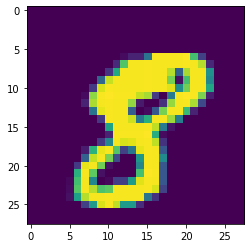

In [10]:
print_image( 10 )

### How images actually look like?

In [11]:
np.set_printoptions(precision=4, linewidth=120)

In [12]:
image_buffer[10].reshape(28, 28)[5:28, 5:25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   7,  24,  24,  97, 253, 253, 253, 253, 255, 180,  48,   0,   0],
       [  0,   0,   0,   0,   0,   0,  30, 186, 252, 252, 253, 252, 252, 252, 252, 253, 252, 227,  29,   0],
       [  0,   0,   0,   0,   0,  38, 155, 252, 252, 252, 253, 252, 252, 227,  79, 222, 252, 252, 129,   0],
       [  0,   0,   0,   0,  85, 233, 252, 252, 252, 252, 253, 252, 252, 202,  11, 180, 252, 252, 119,   0],
       [  0,   0,   0,  43, 240, 253, 252, 252, 252, 252, 253, 252, 252, 244, 126, 201, 252, 252, 150,   0],
       [  0,   0,   7, 212, 253, 255, 253, 253, 253, 232, 221,  42,   0, 104, 253, 255, 253, 205,  21,   0],
       [  0,   0,  25, 223, 252, 253, 252, 252, 214,  18,   0,   0,  34, 215, 252, 253, 223,  56,   0,   0],
       [  0,   0,   0,  99, 246, 253, 252, 252,  77,   0,   7,  70, 203, 252, 252, 173,  25,   0,   0,   0],
       [  0,   0,  

### Checking shape of the image file

In [13]:
image_buffer[0].shape

(784,)

### Reshaping all images

In [14]:
reshaped_images = np.array([x.reshape( 28, 28) for x in image_buffer])

In [15]:
reshaped_images.shape

(42000, 28, 28)

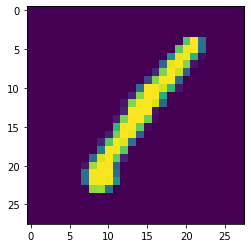

In [16]:
plt.imshow(reshaped_images[0]);

## Classifying Digits

### Importing all required libraries

In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import tensorflow as tf
from tensorflow import keras
from keras import backend as K

In [19]:
print(tf.__version__)
print(keras.__version__)

2.5.0
2.5.0


### Set X and Y

In [20]:
X = reshaped_images

In [21]:
y = keras.utils.to_categorical( labels_np )

In [22]:
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

### Splitting datasets into train and test

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split( X, 
                                                     y,
                                                     test_size = 0.2,
                                                     random_state = 42 )

In [25]:
X_train.shape

(33600, 28, 28)

In [26]:
X_test.shape

(8400, 28, 28)

In [27]:
y_train.shape

(33600, 10)

In [28]:
y_test.shape

(8400, 10)

In [29]:
input_shape = X_train.shape[-2:]

In [30]:
print(input_shape)

(28, 28)


### Train a model

In [31]:
# import necessary building blocks
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation

### Neural Networks Architecture 

- Layer
- Neurons
- Activation

## Model 1

In [32]:
model = Sequential()

model.add(Dense(64, input_shape=input_shape))
# An "activation" is just a non-linear function applied to the output
# of the layer above. Here, with a "rectified linear unit",
# we clamp all values below 0 to 0.
model.add(Flatten())

model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(16))
model.add(Activation('relu'))

model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

### Explain number of parameters need to be trainined

- All the links (compute)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 28, 64)            1856      
_________________________________________________________________
flatten (Flatten)            (None, 1792)              0         
_________________________________________________________________
activation (Activation)      (None, 1792)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                57376     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
activation_2 (Activation)    (None, 16)                0

### Loss Function

### Gradient Descent

- Learning Rate
- Optimizers

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

### Training Model

- Epochs
- Batch Size

In [ ]:
EPOCHS = 20
BATCH_SIZE = 128

In [36]:
%%time 
# fit model
history = model.fit(
    X_train, 
    y_train,  # prepared data
    batch_size = BATCH_SIZE,
    epochs = EPOCHS,
    validation_split = 0.3,
    shuffle = True,
    verbose=1,
)

Epoch 1/10
184/184 [==============================] - 17s 9ms/step - loss: 4.5503 - accuracy: 0.1659 - val_loss: 2.0749 - val_accuracy: 0.2114
Epoch 2/10
184/184 [==============================] - 1s 5ms/step - loss: 2.0500 - accuracy: 0.2087 - val_loss: 2.0526 - val_accuracy: 0.2123
Epoch 3/10
184/184 [==============================] - 1s 5ms/step - loss: 2.0348 - accuracy: 0.2127 - val_loss: 1.9243 - val_accuracy: 0.2771
Epoch 4/10
184/184 [==============================] - 1s 5ms/step - loss: 1.8996 - accuracy: 0.2768 - val_loss: 1.8163 - val_accuracy: 0.3025
Epoch 5/10
184/184 [==============================] - 1s 5ms/step - loss: 1.7889 - accuracy: 0.3036 - val_loss: 1.7072 - val_accuracy: 0.3534
Epoch 6/10
184/184 [==============================] - 1s 6ms/step - loss: 1.6067 - accuracy: 0.3868 - val_loss: 1.5089 - val_accuracy: 0.4222
Epoch 7/10
184/184 [==============================] - 1s 5ms/step - loss: 1.4283 - accuracy: 0.4428 - val_loss: 1.1256 - val_accuracy: 0.6024
Epoch

In [37]:
# summarize history for accuracy

def plot_accuracy(hist):
    plt.plot(hist['accuracy'])
    plt.plot(hist['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [38]:
# summarize history for loss

def plot_loss(hist):
    plt.plot(hist['loss'])
    plt.plot(hist['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

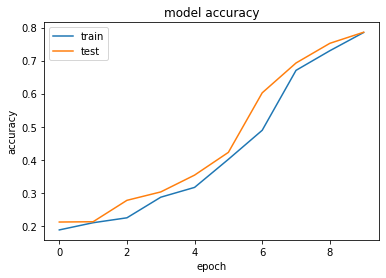

In [39]:
plot_accuracy(history.history)

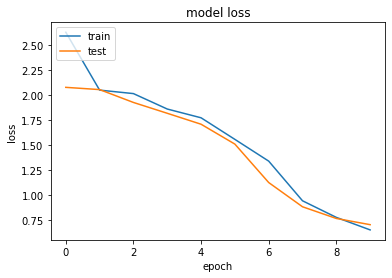

In [40]:
plot_loss(history.history)

### Predict and Evaluate

In [41]:
score = model.evaluate(X_test, y_test)
print()
print('Test accuracy: ', score[1])

263/263 [==============================] - 1s 3ms/step - loss: 0.7006 - accuracy: 0.7881

Test accuracy:  0.788095235824585


In [42]:
predictions = model.predict_classes(X_test)

predictions = list(predictions)

### Verifying Predictions

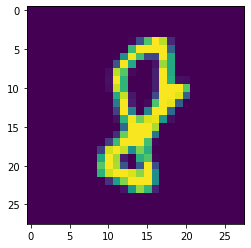

In [43]:
plt.imshow(X_test[0])

In [44]:
predictions[0]

8

In [45]:
len(X_test)

8400

### Randomly show a set of images and predictions

In [46]:
import random 

all_indexes = list(range(len(X_test)))
test_indexes = random.sample( all_indexes, 15 )

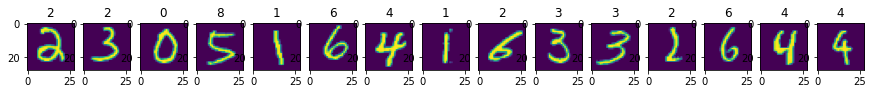

In [47]:
k = 1
plt.figure( figsize=(15, 6))
for i in test_indexes:
    plt.subplot(1, 15, k);
    plt.imshow(X_test[i])
    plt.title(str(predictions[i]))
    k = k + 1
plt.show()

### Confusion Matrix

In [48]:
np_label_list = list(np.unique(labels_np))

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
y_pred_classes = model.predict_classes(X_test)

In [51]:
y_actual_classes = np.argmax(y_test, axis=1)

In [52]:
y_pred_classes

array([8, 1, 9, ..., 2, 0, 9])

In [53]:
y_actual_classes

array([8, 1, 9, ..., 3, 0, 9])

In [54]:
confusion_matrix(y_pred_classes, y_actual_classes)

array([[768,   0,   1,   3,   1,  72,   3,   2,   5,   1],
       [  0, 881,   0,   6,   0,   0,   0,   7,   2,   2],
       [ 21,   8, 760, 303,  16,   7,  17,  24,   4,   2],
       [  2,  14,  54, 511,   2,  59,   9,  17, 112,  12],
       [  0,   1,   7,   7, 797,   3,   1,  55,   5, 108],
       [ 15,   0,   4,   1,   0,  88,   8,   0,  25,   1],
       [  4,   1,   7,   0,   2,  25, 739,   1,  11,   0],
       [  1,   1,   6,   2,   1,   1,   1, 737,   4,  15],
       [  5,   2,   7,  98,   1, 444,   7,   5, 660,  18],
       [  0,   1,   0,   6,  19,   3,   0,  45,   7, 679]])

In [55]:
import seaborn as sn

In [56]:
def plot_confustion_matrix(y_test, y_pred):
    plt.figure(figsize=(10, 8))
    plt.title('Confusion matrix', fontsize=16)
    cm = confusion_matrix(y_test, y_pred, np_label_list)
    sn.heatmap(cm, annot=True,  fmt='.2f', 
               xticklabels = np_label_list, 
               yticklabels = np_label_list )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    plt.show()

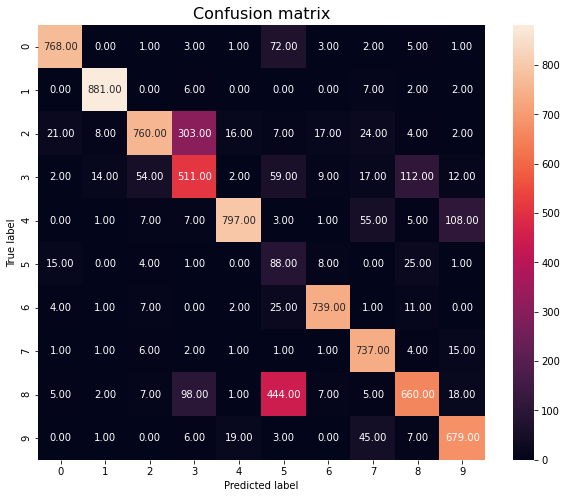

In [57]:
plot_confustion_matrix(y_pred_classes, y_actual_classes)

### Exercise: Build a deeper model

- Add one more layers with 128 neurons

# Convolution Neural Networks (CNN)
## What is Convolution?

Convolutions Demo:

- https://setosa.io/ev/image-kernels/

- https://ml4a.github.io/demos/convolution_all/


- Filter
- Kernel Size

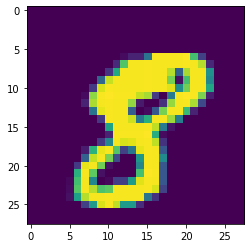

In [58]:
plt.grid(False)
plt.imshow( image_buffer[10].reshape(28, 28));

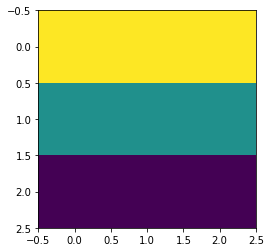

In [59]:
top=[[ 1, 1, 1],
     [ 0, 0, 0],     
     [ -1, -1, -1]]
plt.grid(False)
plt.imshow(top);

In [60]:
from scipy.ndimage.filters import correlate, convolve

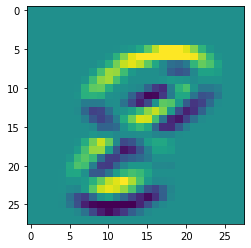

In [61]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   top)
plt.grid(False)
plt.imshow(convtop);

In [62]:
np.rot90(top, 1)

array([[ 1,  0, -1],
       [ 1,  0, -1],
       [ 1,  0, -1]])

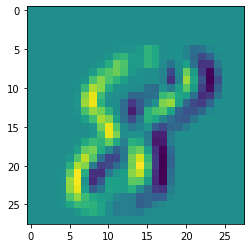

In [63]:
convtop = convolve(image_buffer[10].reshape(28, 28), 
                   np.rot90(top, 1))
plt.grid(False)
plt.imshow(convtop);

## CNN Model

- Strides
- Padding
- MaxPooling

In [64]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout

In [65]:
X_train_shape = X_train.shape
print(X_train_shape)

(33600, 28, 28)


In [66]:
X_test_shape = X_test.shape
print(X_test_shape)

(8400, 28, 28)


In [67]:
X_train_reshaped = X_train.reshape(X_train_shape[0],
                                   X_train_shape[1],
                                   X_train_shape[2], 1)

X_test_reshaped = X_test.reshape(X_test_shape[0],
                                 X_test_shape[1],
                                 X_test_shape[2], 1)

In [68]:
new_input_shape = (X_train_shape[1],X_train_shape[2], 1)

In [69]:
new_input_shape

(28, 28, 1)

## Model 2: 

input -> Conv2D -> Output -> Softmax

In [70]:
K.clear_session()  # clear default graph

model = Sequential()
model.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model.add(Activation('relu'))
                            
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
    
model.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model.add(Activation('softmax'))

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                13530     
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
Total params: 13,610
Trainable params: 13,610
Non-trainable params: 0
____________________________________________________

In [72]:
model.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [73]:
%%time

history = model.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
263/263 [==============================] - 17s 6ms/step - loss: 17.0203 - accuracy: 0.6788 - val_loss: 1.4495 - val_accuracy: 0.9126
Epoch 2/10
263/263 [==============================] - 1s 4ms/step - loss: 1.1095 - accuracy: 0.9257 - val_loss: 0.7737 - val_accuracy: 0.9396
Epoch 3/10
263/263 [==============================] - 1s 5ms/step - loss: 0.5240 - accuracy: 0.9511 - val_loss: 0.5488 - val_accuracy: 0.9495
Epoch 4/10
263/263 [==============================] - 1s 4ms/step - loss: 0.3831 - accuracy: 0.9589 - val_loss: 0.4551 - val_accuracy: 0.9533
Epoch 5/10
263/263 [==============================] - 1s 5ms/step - loss: 0.2499 - accuracy: 0.9665 - val_loss: 0.4295 - val_accuracy: 0.9508
Epoch 6/10
263/263 [==============================] - 1s 4ms/step - loss: 0.1731 - accuracy: 0.9715 - val_loss: 0.3949 - val_accuracy: 0.9530
Epoch 7/10
263/263 [==============================] - 1s 5ms/step - loss: 0.1356 - accuracy: 0.9769 - val_loss: 0.3247 - val_accuracy: 0.9595
Epoc

### Plotting Loss and Accuracy

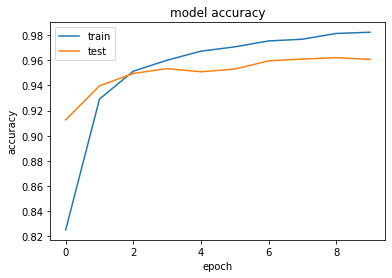

In [74]:
plot_accuracy(history.history)

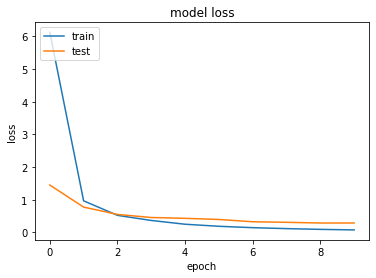

In [75]:
plot_loss(history.history)

### Model 2:

input -> Conv2D -> Dense(32) (Fully Conntected Layer) -> Dense(10) -> Softmax

In [76]:
K.clear_session()  # clear default graph

model2 = Sequential()
model2.add(Conv2D(filters=8, kernel_size=(3,3), input_shape=new_input_shape))
model2.add(Activation('relu'))
                            
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())
    
model2.add(Dense(32))    
model2.add(Activation('relu'))

model2.add(Dense(10))
# This special "softmax" activation among other things,
# ensures the output is a valid probaility distribution, that is
# that its values are all non-negative and sum to 1.
model2.add(Activation('softmax'))

In [77]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 8)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 1352)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                43296     
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [78]:
model2.compile(optimizer='adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [79]:
BATCH_SIZE = 64
EPOCHS = 10

In [80]:
%%time

history2 = model2.fit(
    X_train_reshaped, 
    y_train,  # prepared data
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_test_reshaped, y_test),
    verbose=1
)

Epoch 1/10
525/525 [==============================] - 4s 5ms/step - loss: 4.1382 - accuracy: 0.5446 - val_loss: 0.6585 - val_accuracy: 0.8438
Epoch 2/10
525/525 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.8812 - val_loss: 0.3166 - val_accuracy: 0.9276
Epoch 3/10
525/525 [==============================] - 2s 4ms/step - loss: 0.2368 - accuracy: 0.9439 - val_loss: 0.2128 - val_accuracy: 0.9508
Epoch 4/10
525/525 [==============================] - 2s 4ms/step - loss: 0.1385 - accuracy: 0.9644 - val_loss: 0.1658 - val_accuracy: 0.9601
Epoch 5/10
525/525 [==============================] - 2s 4ms/step - loss: 0.1043 - accuracy: 0.9710 - val_loss: 0.1504 - val_accuracy: 0.9637
Epoch 6/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0759 - accuracy: 0.9782 - val_loss: 0.1374 - val_accuracy: 0.9680
Epoch 7/10
525/525 [==============================] - 2s 4ms/step - loss: 0.0623 - accuracy: 0.9811 - val_loss: 0.1405 - val_accuracy: 0.9683
Epoch 

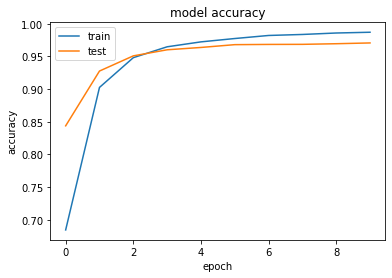

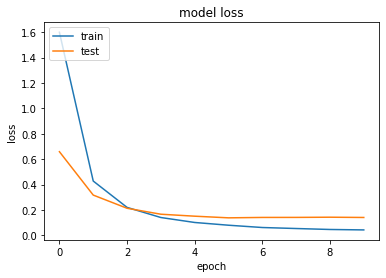

In [81]:
plot_accuracy(history2.history)

plot_loss(history2.history)

## Prediction on Test Images

In [82]:
predictions_2 = model2.predict_classes(X_test_reshaped)

predictions_2 = list(predictions_2)

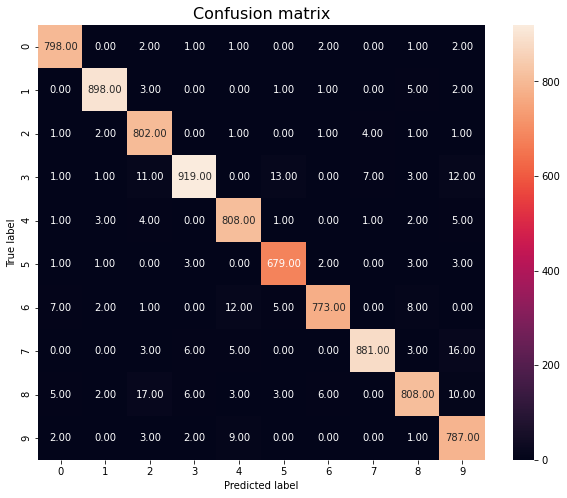

In [83]:
plot_confustion_matrix(predictions_2, 
                       y_actual_classes)

In [84]:
from sklearn import metrics

In [86]:
metrics.accuracy_score(predictions_2, 
                       y_actual_classes)

0.9705952380952381

### Saving Model

In [94]:
model2.save('digits_model_2.h5')

In [95]:
!ls -al

total 564
drwxr-xr-x 1 root root   4096 Jun 30 09:33 .
drwxr-xr-x 1 root root   4096 Jun 30 09:29 ..
drwxr-xr-x 4 root root   4096 Jun 15 13:37 .config
-rw-r--r-- 1 root root 560608 Jun 30 09:33 digits_model_2.h5
drwxr-xr-x 1 root root   4096 Jun 15 13:37 sample_data


## Load model and make prediction

In [96]:
from keras.models import load_model

new_model = load_model('digits_model_2.h5')

In [97]:
predictions_new = new_model.predict_classes(X_test_reshaped)

In [98]:
predictions_new[0:10]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1])